In [1]:
import scipy.io
import scipy.stats
import random
import numpy as np
import os
import itertools
import pickle as pk

import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

import sys, os
sys.path.append("/Users/xiaoxuanj/Dropbox/jim_data/human_behavior/1600_rep/")


In [2]:
with open("/Users/xiaoxuanj/Dropbox/jim_unsupervised_learning_paper/human_behavior/1600_rep/learning_6face_overtime_combine_boot", 'rb') as f:
    u = pk._Unpickler(f)
    u.encoding = 'latin1'
    [dprime_mb_s, dprime_mb_b, percent_mb_s, percent_mb_b, dprime_ms_s, dprime_ms_b, percent_ms_s, percent_ms_b,dprime_nonmb_s, dprime_nonmb_b, percent_nonmb_s, percent_nonmb_b] = u.load()
    

In [3]:
percent_mb_s.mean(1).mean(1)[0]

0.6750041186324949

Text(0.5, 1.0, 'Medium big swap exposure')

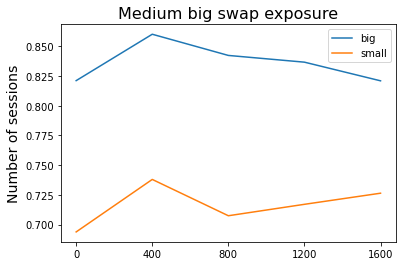

In [4]:
plt.plot(percent_mb_b.mean(1)[:,2], label='big')
plt.plot(percent_mb_s.mean(1)[:,2], label='small')
plt.ylabel('Percent correct', fontsize=14)
plt.legend()
plt.xticks(range(5), [0,400,800,1200,1600])
plt.ylabel('Number of sessions', fontsize=14)
plt.title('Medium big swap exposure', fontsize=16)

(5, 100)


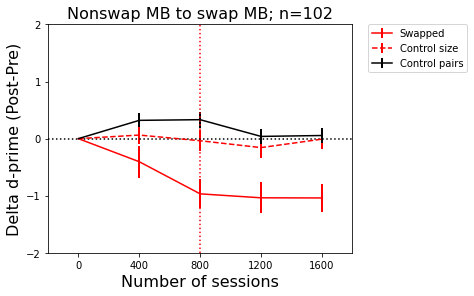

In [5]:
# Figure 2 plot
fig = plt.figure(figsize = (12,4.2))
ax = fig.add_subplot(121)
temp = []
for i in range(5):
    temp.append(dprime_mb_b[i,:,0]-dprime_mb_b[0,:,0])
print(np.array(temp).shape)
ax.errorbar(np.linspace(1,5,5),np.ma.masked_invalid(temp).mean(1),np.ma.masked_invalid(temp).std(1),color = 'r', ecolor = 'r', label = 'Swapped',elinewidth=2)
np.save('break_mb_b.npy', np.array(temp))

temp = []
for i in range(5):
    temp.append(dprime_mb_s[i,:,0]-dprime_mb_s[0,:,0])
ax.errorbar(np.linspace(1,5,5),np.ma.masked_invalid(temp).mean(1),np.ma.masked_invalid(temp).std(1),color = 'r', linestyle="dashed", ecolor = 'r', label = 'Control size',elinewidth=2)
np.save('break_mb_s.npy', np.array(temp))

temp = []
for i in range(5):
    ttemp=[]
    for p in [1,2]:
        ttemp.append(dprime_mb_b[i,:,p]-dprime_mb_b[0,:,p])
    temp.append(ttemp)
temp=np.mean(temp,axis=1)
ax.errorbar(np.linspace(1,5,5),np.ma.masked_invalid(temp).mean(1),np.ma.masked_invalid(temp).std(1),color = 'k', ecolor = 'k', label = 'Control pairs',elinewidth=2)
np.save('break_mb_b_control.npy', np.array(temp))


plt.plot([0.5,5.5],[0,0],':k')
plt.xlabel('Number of sessions',fontsize = 16)
plt.xlim(0.5,5.5)
plt.ylim(-2,2)
ax.set_yticks([-2,-1,0,1,2])
ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels([0,400,800,1200,1600])
plt.ylabel('Delta d-prime (Post-Pre)',fontsize = 16)
ax.tick_params(axis='y', direction='out')
ax.tick_params(axis='x', direction='out')
plt.title('Nonswap MB to swap MB; n=102',fontsize = 16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([3,3],[-2,2],':r')

#plt.savefig('/mindhive/dicarlolab/u/jiaxx/figures/figure2_learning_overtime_switch_new.pdf', format='eps', dpi=1000)



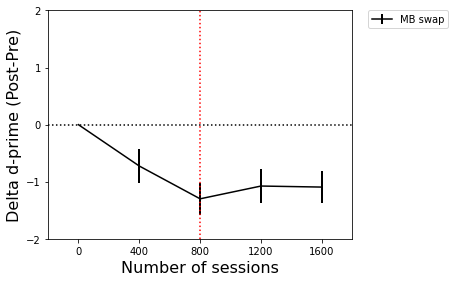

In [6]:
# Figure 2 plot
fig = plt.figure(figsize = (12,4.2))
ax = fig.add_subplot(121)
mb = []
for i in range(5):
    mb.append(dprime_mb_b[i,:,0]-dprime_mb_b[0,:,0])

ms = []
for i in range(5):
    ttemp=[]
    for p in [1,2]:
        ttemp.append(dprime_mb_b[i,:,p]-dprime_mb_b[0,:,p])
    ms.append(ttemp)
ms=np.mean(ms,axis=1)
    
effect = []
for i in range(100):
    #for j in range(100):
    effect.append(np.array(mb)[:,i]-np.array(ms)[:,i])
        
ax.errorbar(np.linspace(1,5,5),np.ma.masked_invalid(effect).mean(0),np.ma.masked_invalid(effect).std(0),color = 'k', ecolor = 'k', label = 'MB swap',elinewidth=2)


plt.plot([0.5,5.5],[0,0],':k')
plt.xlabel('Number of sessions',fontsize = 16)
plt.xlim(0.5,5.5)
plt.ylim(-2,2)
ax.set_yticks([-2,-1,0,1,2])
ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels([0,400,800,1200,1600])
plt.ylabel('Delta d-prime (Post-Pre)',fontsize = 16)
ax.tick_params(axis='y', direction='out')
ax.tick_params(axis='x', direction='out')
#plt.title('Nonswap MB to swap MB; n=37',fontsize = 16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([3,3],[-2,2],':r')

In [10]:
def get_pval(tmp, val, m='left'):
    # tmp is a normal distribution of bootstrapped samples
    if len(tmp)>10:
        if m=='left':
            # distribution with mean smaller than 0
            pval = len(np.where(tmp>=0)[0])/len(tmp)
        else:
            # distribution with mean larger than 0
            pval = len(np.where(tmp<=0)[0])/len(tmp)
        return pval
    else:
        print('empty entry')

In [11]:
for i in np.arange(1,5):
    tmp = np.ma.masked_invalid(effect)[:,i].data
    pval = get_pval(tmp, 1, m='left')
    print(pval)

0.01
0.0
0.0
0.0


In [40]:
# confidence intervals
alpha = 0.95
tmp = np.ma.masked_invalid(effect)[:,1].data
p = ((1.0-alpha)/2.0) * 100
lower = np.percentile(tmp, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = np.percentile(tmp, p)
print('95% confidence interval ', upper, lower, )

95% confidence interval  -0.1779417433917851 -1.2735306122975225


In [20]:
p = (alpha+((1.0-alpha)/2.0)) * 100
np.percentile(tmp, p)

-1.583717225033884

In [39]:
from scipy import stats
tmp = np.ma.masked_invalid(effect)[:,1].data
1-stats.percentileofscore(tmp, 0)/100

0.010000000000000009

In [22]:
np.ma.masked_invalid(effect)[:,1].data.std()

0.2943004395178418

In [25]:
# t-test compared to 0
from scipy.stats import ttest_ind, ttest_1samp
for i in np.arange(1,5):
    t, p = ttest_1samp(np.ma.masked_invalid(effect)[:,i].data,0)
    print(t, p)

-24.49968103608336 8.139269848087883e-44
-46.8221599851682 2.3559740153028575e-69
-35.44439515127764 4.6479862534569314e-58
-38.62947298933524 1.6397085870643543e-61


In [16]:
np.array(effect).shape

(100, 5)

In [17]:
np.save('break_learning_effect.npy', np.array(effect))

In [165]:
# predict non-swap

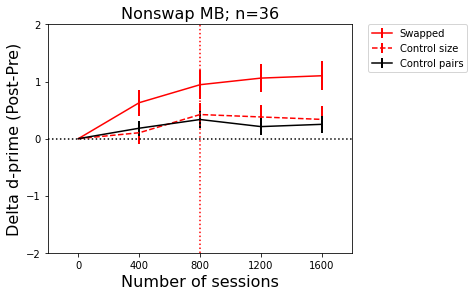

In [12]:
# Figure 2 plot
fig = plt.figure(figsize = (12,4.2))
ax = fig.add_subplot(121)
temp = []
for i in range(5):
    temp.append(dprime_nonmb_b[i,:,0]-dprime_nonmb_b[0,:,0])
ax.errorbar(np.linspace(1,5,5),np.ma.masked_invalid(temp).mean(1),np.ma.masked_invalid(temp).std(1),color = 'r', ecolor = 'r', label = 'Swapped',elinewidth=2)
np.save('build_mb_b.npy', np.array(temp))

temp = []
for i in range(5):
    temp.append(dprime_nonmb_s[i,:,0]-dprime_nonmb_s[0,:,0])
ax.errorbar(np.linspace(1,5,5),np.ma.masked_invalid(temp).mean(1),np.ma.masked_invalid(temp).std(1),color = 'r', linestyle="dashed", ecolor = 'r', label = 'Control size',elinewidth=2)
np.save('build_mb_s.npy', np.array(temp))

temp = []
for i in range(5):
    ttemp=[]
    for p in [1,2]:
        ttemp.append(dprime_nonmb_b[i,:,p]-dprime_nonmb_b[0,:,p])
    temp.append(ttemp)
temp=np.mean(temp,axis=1)
ax.errorbar(np.linspace(1,5,5),np.ma.masked_invalid(temp).mean(1),np.ma.masked_invalid(temp).std(1),color = 'k', ecolor = 'k', label = 'Control pairs',elinewidth=2)
np.save('build_mb_b_other.npy', np.array(temp))


plt.plot([0.5,5.5],[0,0],':k')
plt.xlabel('Number of sessions',fontsize = 16)
plt.xlim(0.5,5.5)
plt.ylim(-2,2)
ax.set_yticks([-2,-1,0,1,2])
ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels([0,400,800,1200,1600])
plt.ylabel('Delta d-prime (Post-Pre)',fontsize = 16)
ax.tick_params(axis='y', direction='out')
ax.tick_params(axis='x', direction='out')
plt.title('Nonswap MB; n=36',fontsize = 16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([3,3],[-2,2],':r')

#plt.savefig('/mindhive/dicarlolab/u/jiaxx/figures/figure2_learning_overtime_switch_new.pdf', format='eps', dpi=1000)



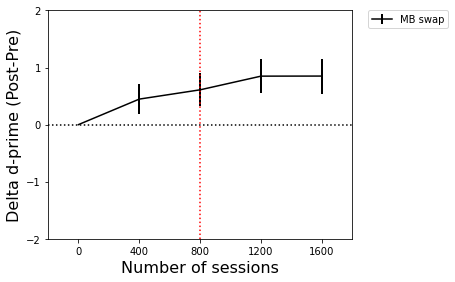

In [13]:
# Figure 2 plot
fig = plt.figure(figsize = (12,4.2))
ax = fig.add_subplot(121)
mb = []
for i in range(5):
    mb.append(dprime_nonmb_b[i,:,0]-dprime_nonmb_b[0,:,0])

ms = []
for i in range(5):
    ttemp=[]
    for p in [1,2]:
        ttemp.append(dprime_nonmb_b[i,:,p]-dprime_nonmb_b[0,:,p])
    ms.append(ttemp)
ms=np.mean(ms,axis=1)
    
effect = []
for i in range(100):
    #for j in range(100):
    effect.append(np.array(mb)[:,i]-np.array(ms)[:,i])
        
ax.errorbar(np.linspace(1,5,5),np.ma.masked_invalid(effect).mean(0),np.ma.masked_invalid(effect).std(0),color = 'k', ecolor = 'k', label = 'MB swap',elinewidth=2)


plt.plot([0.5,5.5],[0,0],':k')
plt.xlabel('Number of sessions',fontsize = 16)
plt.xlim(0.5,5.5)
plt.ylim(-2,2)
ax.set_yticks([-2,-1,0,1,2])
ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels([0,400,800,1200,1600])
plt.ylabel('Delta d-prime (Post-Pre)',fontsize = 16)
ax.tick_params(axis='y', direction='out')
ax.tick_params(axis='x', direction='out')
#plt.title('Nonswap MB to swap MB; n=37',fontsize = 16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([3,3],[-2,2],':r')

In [21]:
np.save('build_learning effect.npy', np.array(effect))


In [14]:
for i in np.arange(1,5):
    tmp = np.ma.masked_invalid(effect)[:,i].data
    pval = get_pval(tmp, 1, m='right')
    print(pval)

0.03
0.02
0.0
0.0
